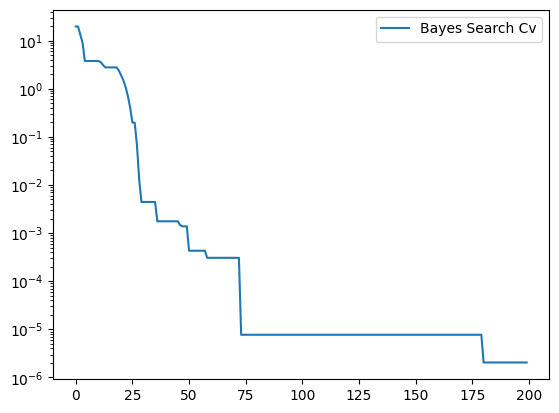

In [3]:
from skopt.benchmarks import branin as _branin
from skopt.space import Real
from skopt.utils import use_named_args
import numpy as np
import matplotlib.pyplot as plt
from gpflow.kernels import Matern52 as mt52
from skopt import BayesSearchCV
from skopt import gp_minimize

class FuncToMinimise():
    def __init__(self):
        self.regret_arr = []
        self.num_evals = 0
    
    def eval(self, x):
        print('This is a base class please specify a child')
        return

class Branin(FuncToMinimise):
    def __init__(self):
        super().__init__()
        self.optimal_val = 0.397887
        self._eval_points = []
        self._eval_vals = []
    
    def _update_regret(self):
        if self.regret_arr:
            regret = min(self.regret_arr[-1], abs(self.optimal_val-self._eval_vals[-1]))
        else:
            regret = abs(self.optimal_val-self._eval_vals[-1])
        self.regret_arr.append(regret)

    def eval(self, x):
        self.num_evals += 1
        self._eval_points.append(x)
        self._eval_vals.append(_branin(x))
        self._update_regret()
        return self._eval_vals[-1]

def plot_results(results):
    for result in results:
        plt.plot(result['regret'], label=result['name'])
        plt.legend()
    plt.yscale(value="log")
    plt.plot()

def main():
    branin_instance = Branin()

    search_space = [
        Real(-5.0, 10.0, name='x1'),
        Real(0.0, 15.0, name='x2')
    ]

    @use_named_args(search_space)
    def objective_function(**params):
        x = [params['x1'], params['x2']]
        return branin_instance.eval(x)

    res = gp_minimize(
        func=objective_function,
        dimensions=search_space,
        n_calls=200,
        random_state=42
    )

    result = [{'name':'Bayes Search Cv',
            'regret':branin_instance.regret_arr}]
    plot_results(result)

main()


